In [ ]:
API_KEY  =  '953f736b8ce9aa141b2cd91dbb8df63a'

In [ ]:
#requried libraries are installed
#matplotlib and seaborn or visualization libraries
#pandas is the manipulation libraries
pip install requests matplotlib seaborn pandas


In [10]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

In [11]:
API_KEY = '6def2a0bb9454bc0cacc94e5cc5971b7'
CITY = 'London'
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric'

In [12]:
response = requests.get(URL)
data = response.json()

# Check if the request was successful
if data['cod'] != '200':
    print("Error fetching data:", data['message'])
    exit()

In [13]:
records = []
for entry in data['list']:
    timestamp = datetime.utcfromtimestamp(entry['dt'])
    temp = entry['main']['temp']
    feels_like = entry['main']['feels_like']
    humidity = entry['main']['humidity']
    wind_speed = entry['wind']['speed']
    description = entry['weather'][0]['description']

    records.append({
        'timestamp': timestamp,
        'temp': temp,
        'feels_like': feels_like,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'description': description
    })

df = pd.DataFrame(records)
print(df.head())

            timestamp   temp  feels_like  humidity  wind_speed  \
0 2025-05-14 09:00:00  13.11       12.33        71        4.30   
1 2025-05-14 12:00:00  18.71       17.97        51        4.24   
2 2025-05-14 15:00:00  22.32       21.57        37        4.35   
3 2025-05-14 18:00:00  17.66       16.73        48        4.34   
4 2025-05-14 21:00:00  12.98       11.87        59        4.25   

        description  
0         clear sky  
1         clear sky  
2  scattered clouds  
3     broken clouds  
4     broken clouds  


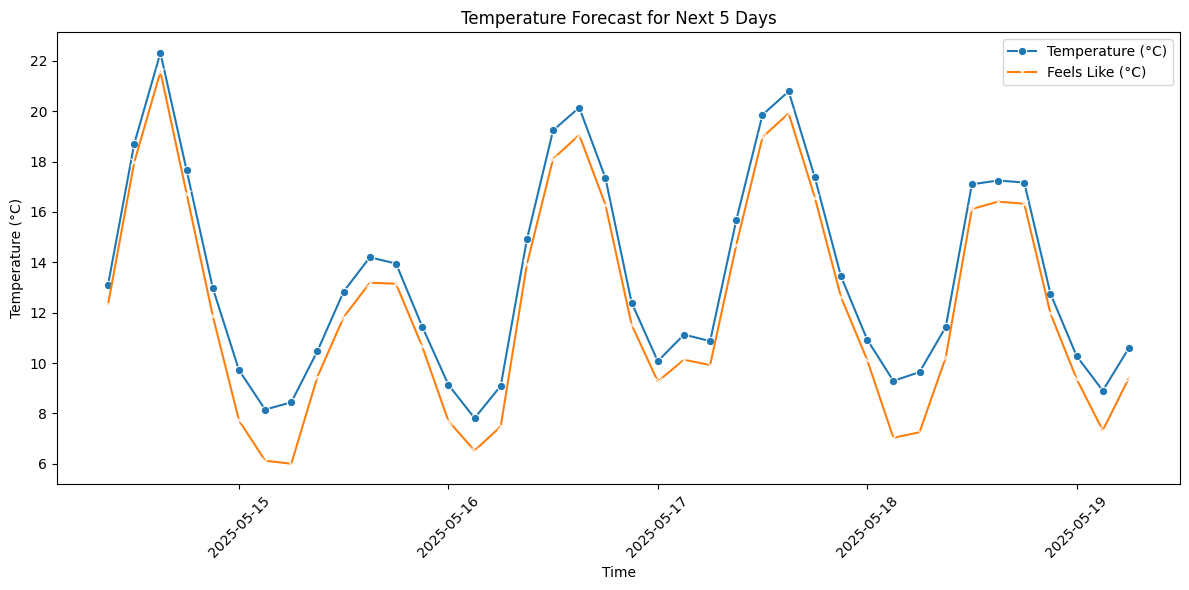

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='temp', data=df, marker='o', label='Temperature (°C)')
sns.lineplot(x='timestamp', y='feels_like', data=df, marker='x', label='Feels Like (°C)')

plt.title('Temperature Forecast for Next 5 Days')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-15-4bc37f791586>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='timestamp', y='humidity', data=df, palette='Blues_d')


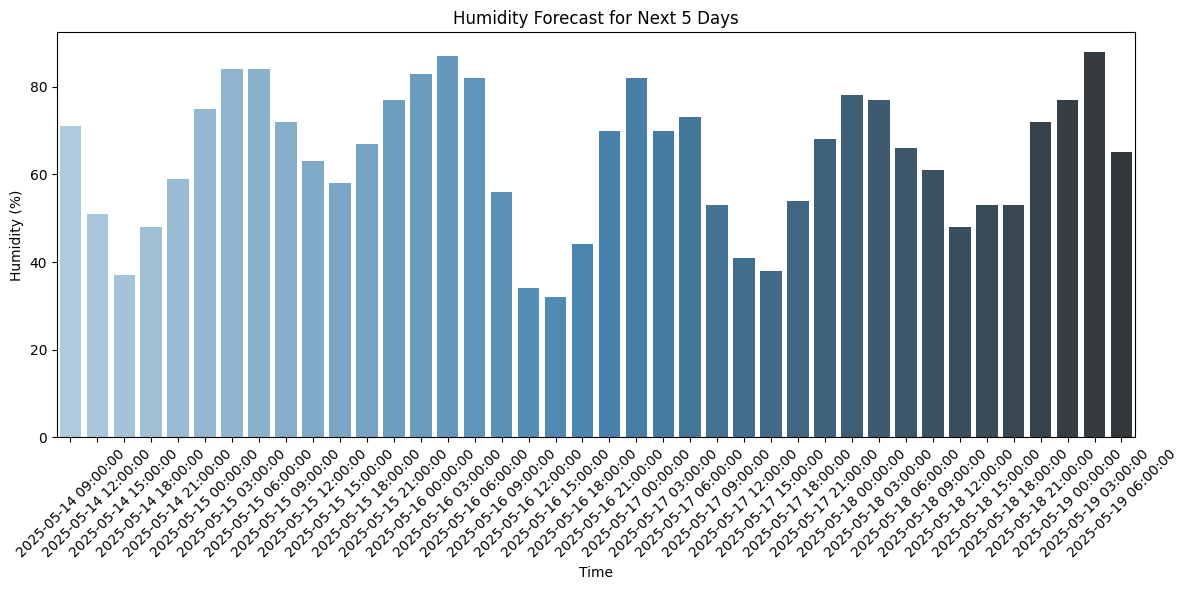

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='timestamp', y='humidity', data=df, palette='Blues_d')
plt.title('Humidity Forecast for Next 5 Days')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

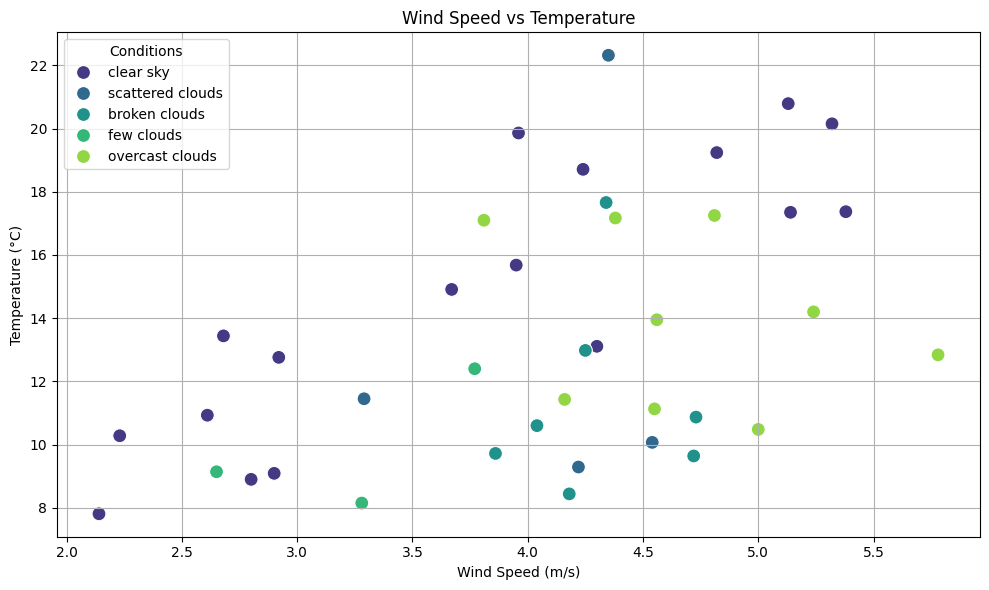

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='temp', hue='description', data=df, palette='viridis', s=100)
plt.title('Wind Speed vs Temperature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Temperature (°C)')
plt.legend(title='Conditions')
plt.grid(True)
plt.tight_layout()
plt.show()